In [1]:
import scanpy as sc

In [42]:
green_monkey_ad = sc.read("/lfs/local/0/yanay/uce_temp/green_monkey_covid_uce_adata.h5ad")
nmr_ad = sc.read("/lfs/local/0/yanay/nmr_female_uce_adata.h5ad")
chicken_retina_ad = sc.read("/lfs/local/0/yanay/uce_temp/chicken_uce_adata.h5ad")
chicken_heart_ad = sc.read("/lfs/local/0/yanay/uce_temp/chicken_heart_uce_adata.h5ad")

In [46]:
nmr_uce = sc.AnnData(nmr_ad.obsm['X_uce'])
nmr_uce.obs = nmr_ad.obs
nmr_uce.obs['species'] = 'nmr'

green_monkey_uce = sc.AnnData(green_monkey_ad.obsm['X_uce'])
green_monkey_uce.obs = green_monkey_ad.obs
green_monkey_uce.obs['species'] = 'monkey'

chicken_retina_uce = sc.AnnData(chicken_retina_ad.obsm['X_uce'])
chicken_retina_uce.obs = chicken_retina_ad.obs
chicken_retina_uce.obs['species'] = 'chicken'

chicken_heart_uce = sc.AnnData(chicken_heart_ad.obsm['X_uce'])
chicken_heart_uce.obs = chicken_heart_ad.obs
chicken_heart_uce.obs['species'] = 'chicken'

In [3]:
tabula_ad = sc.read_h5ad('/dfs/project/cross-species/uce/new_tabula_sapiens_ep_8_sn_2013249_nlayers_33_sample_size_1024.h5ad')


In [49]:
tabula_uce = sc.AnnData(tabula_ad.obsm['X_uce'])
tabula_uce.obs = tabula_ad.obs
tabula_uce.obs['species'] = 'human'

In [6]:
def old_donors(ad):
    # add donors and then filter
    ad.obs["donor_num"] = ad.obs["donor"].str.split("TSP", expand=True)[1].astype(int)
    return ad[ad.obs["donor_num"] <= 15]

In [27]:
tabula_uce = old_donors(tabula_uce)

In [28]:
tabula_uce.obs['cell_type'] = tabula_uce.obs['cell_ontology_class'].values

/dfs/user/yhr/deepsnap/lib/python3.7/site-packages/ipykernel_launcher.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  """Entry point for launching an IPython kernel.


In [50]:
concat_adata = sc.concat([tabula_uce, nmr_uce, green_monkey_uce, chicken_retina_uce, chicken_heart_uce])

In [52]:
sc.pp.neighbors(concat_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [53]:
sc.tl.umap(concat_adata)

### UCE space

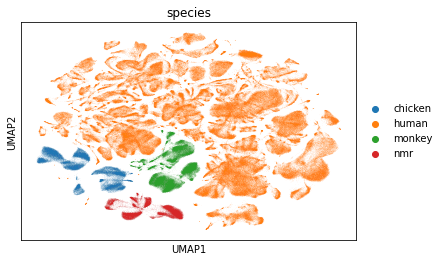

In [54]:
sc.pl.umap(concat_adata, color='species')

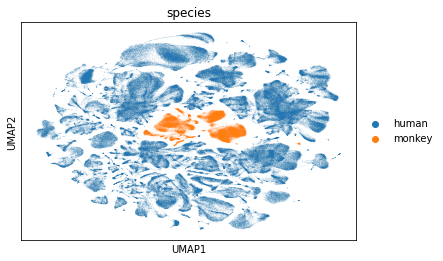

In [33]:
sc.pl.umap(concat_adata, color='species')

### Raw space

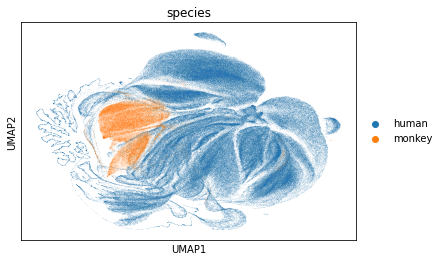

In [23]:
sc.pl.umap(concat_adata, color='species')

### Plan

- UMAP showing overlap of new spcies and human
- Sankey or other detailed plot like confusion matrix showing alignment
- Bar plot showing summary for all 4 species